In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Configurer le style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

# Chargement des données
airlines_df = pd.read_csv("../data/raw/airlines.csv")
airports_df = pd.read_csv("../data/raw/airports.csv")
flights_df = pd.read_csv("../data/raw/flights.csv")

C:\Users\Samir SC\AppData\Local\Temp\ipykernel_22948\4167195994.py:15: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv("../data/raw/flights.csv")


In [13]:
# Configuration
sns.set_style("darkgrid")  # Au lieu de plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Fonction utilitaire pour les statistiques rapides
def quick_stats(df, title="Dataset Statistics"):
    print(f"\n{title}")
    print("="*50)
    print(f"Dimensions: {df.shape}")
    print("\nTypes de données:")
    print(df.dtypes)
    print("\n")
    print("\nValeurs manquantes:")
    missing = df.isnull().sum()
    print(missing[missing > 0] if missing.any() > 0 else "Aucune valeur manquante")
    print("\nAperçu des données:")
    display(df.head())

In [10]:
 # 1) Analyse Préliminaire :

In [15]:


# Analyse de chaque dataset
print("\nAnalyse des datasets:")
for df, name in [(airlines_df, "Airlines"), (airports_df, "Airports"), (flights_df, "Flights")]:
   quick_stats(df, name)

# Statistiques des retards
delay_cols = [col for col in flights_df.columns if 'DELAY' in col]
print("\nStatistiques des retards:")
display(flights_df[delay_cols].describe())


Analyse des datasets:

Airlines
Dimensions: (14, 2)

Types de données:
IATA_CODE    object
AIRLINE      object
dtype: object



Valeurs manquantes:
Aucune valeur manquante

Aperçu des données:


,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways



Airports
Dimensions: (322, 7)

Types de données:
IATA_CODE     object
AIRPORT       object
CITY          object
STATE         object
COUNTRY       object
LATITUDE     float64
LONGITUDE    float64
dtype: object



Valeurs manquantes:
LATITUDE     3
LONGITUDE    3
dtype: int64

Aperçu des données:


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.652,-75.440
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.411,-99.682
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.040,-106.609
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.449,-98.422
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.536,-84.194



Flights
Dimensions: (5819079, 31)

Types de données:
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY   

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.000,-11.000,21.000,15.000,205.000,194.000,169.000,1448,404.000,4.000,430,408.000,-22.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.000,-8.000,12.000,14.000,280.000,279.000,263.000,2330,737.000,4.000,750,741.000,-9.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.000,-2.000,16.000,34.000,286.000,293.000,266.000,2296,800.000,11.000,806,811.000,5.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.000,-5.000,15.000,30.000,285.000,281.000,258.000,2342,748.000,8.000,805,756.000,-9.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.000,-1.000,11.000,35.000,235.000,215.000,199.000,1448,254.000,5.000,320,259.000,-21.000,0,0,NaN,NaN,NaN,NaN,NaN,NaN



Statistiques des retards:


,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5732926.000,5714008.000,1063439.000,1063439.000,1063439.000,1063439.000,1063439.000
mean,9.370,4.407,13.481,0.076,18.970,23.473,2.915
std,37.081,39.271,28.004,2.143,48.162,43.197,20.433
min,-82.000,-87.000,0.000,0.000,0.000,0.000,0.000
25%,-5.000,-13.000,0.000,0.000,0.000,0.000,0.000
50%,-2.000,-5.000,2.000,0.000,2.000,3.000,0.000
75%,7.000,8.000,18.000,0.000,19.000,29.000,0.000
max,1988.000,1971.000,1134.000,573.000,1971.000,1331.000,1211.000


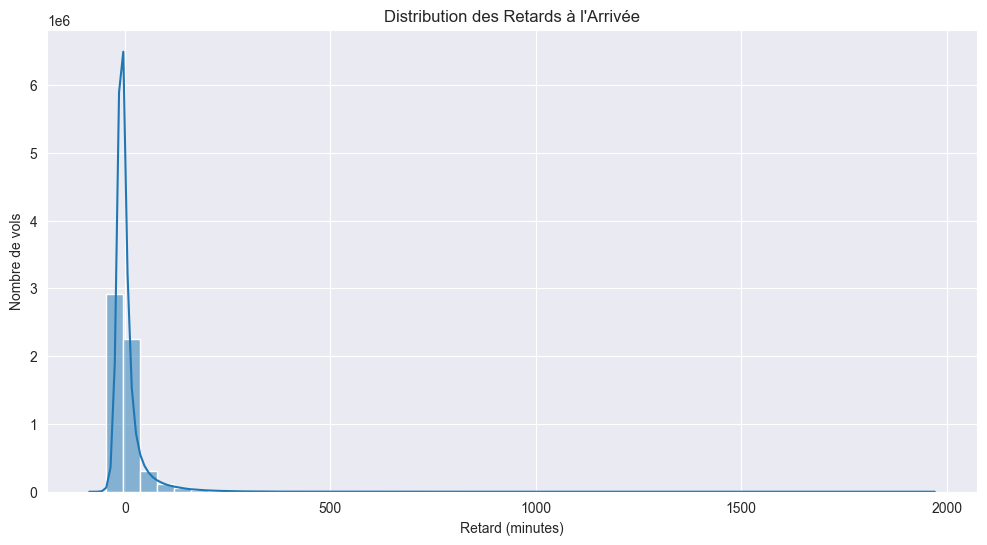

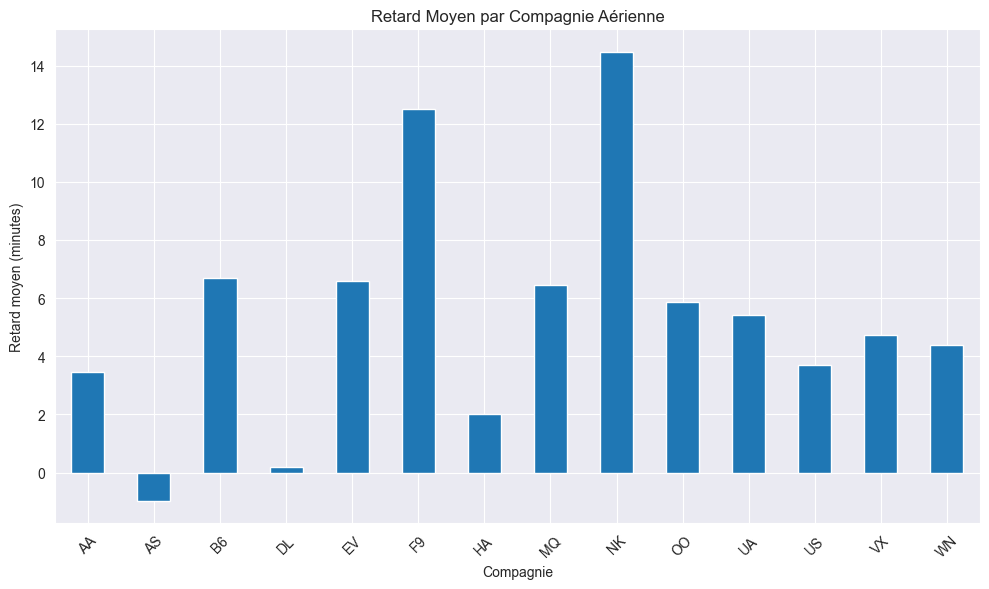

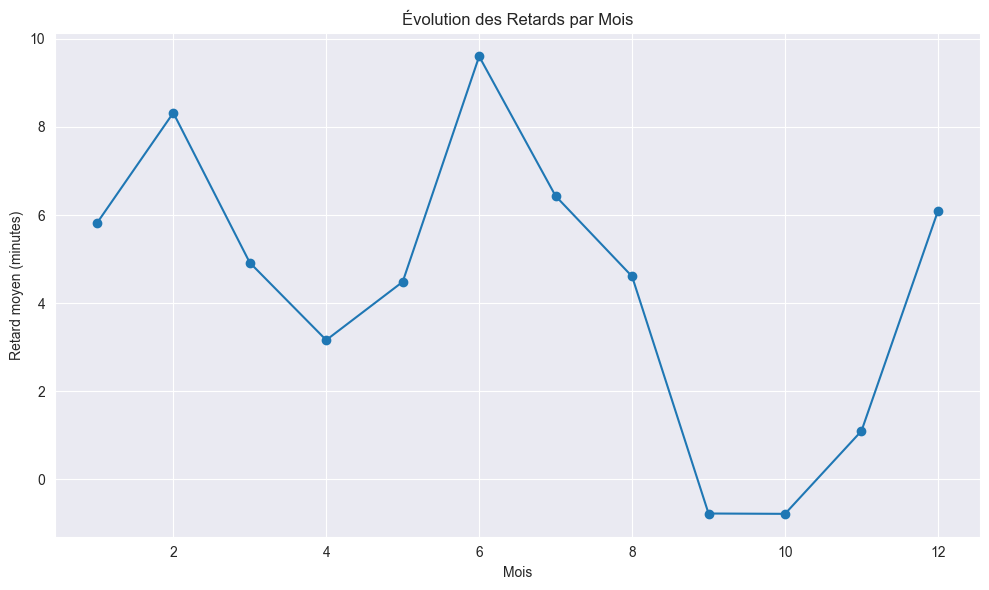

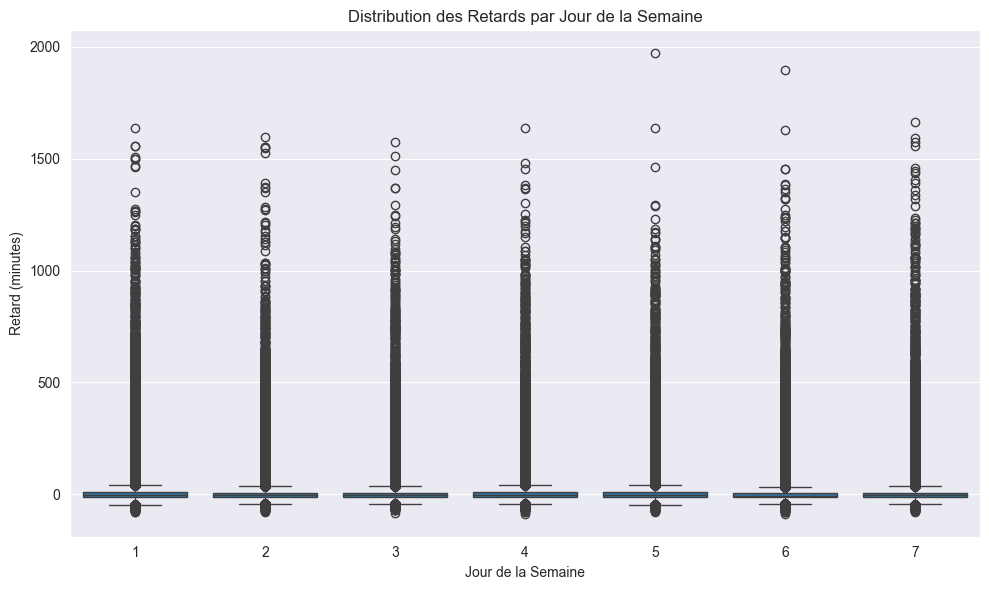

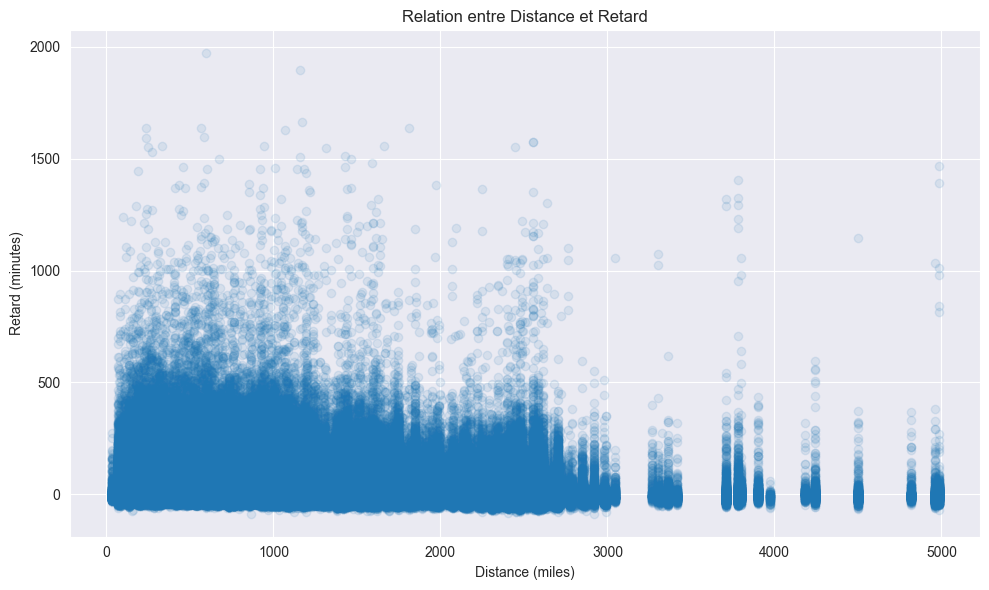

In [16]:
# Visualisations
# 1. Distribution des retards à l'arrivée
plt.figure(figsize=(12, 6))
sns.histplot(data=flights_df['ARRIVAL_DELAY'].dropna(), bins=50, kde=True)
plt.title('Distribution des Retards à l\'Arrivée')
plt.xlabel('Retard (minutes)')
plt.ylabel('Nombre de vols')
plt.show()

# 2. Retards par compagnie aérienne
airline_delays = flights_df.groupby('AIRLINE')['ARRIVAL_DELAY'].agg(['mean', 'count']).round(2)
plt.figure(figsize=(10, 6))
airline_delays['mean'].plot(kind='bar')
plt.title('Retard Moyen par Compagnie Aérienne')
plt.xlabel('Compagnie')
plt.ylabel('Retard moyen (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Évolution temporelle des retards par mois
monthly_delays = flights_df.groupby('MONTH')['ARRIVAL_DELAY'].mean()
plt.figure(figsize=(10, 6))
monthly_delays.plot(kind='line', marker='o')
plt.title('Évolution des Retards par Mois')
plt.xlabel('Mois')
plt.ylabel('Retard moyen (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Distribution des retards par jour de la semaine
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAY_OF_WEEK', y='ARRIVAL_DELAY', data=flights_df)
plt.title('Distribution des Retards par Jour de la Semaine')
plt.xlabel('Jour de la Semaine')
plt.ylabel('Retard (minutes)')
plt.tight_layout()
plt.show()

# 5. Relation entre distance et retard
plt.figure(figsize=(10, 6))
plt.scatter(flights_df['DISTANCE'], flights_df['ARRIVAL_DELAY'], alpha=0.1)
plt.title('Relation entre Distance et Retard')
plt.xlabel('Distance (miles)')
plt.ylabel('Retard (minutes)')
plt.tight_layout()
plt.show()

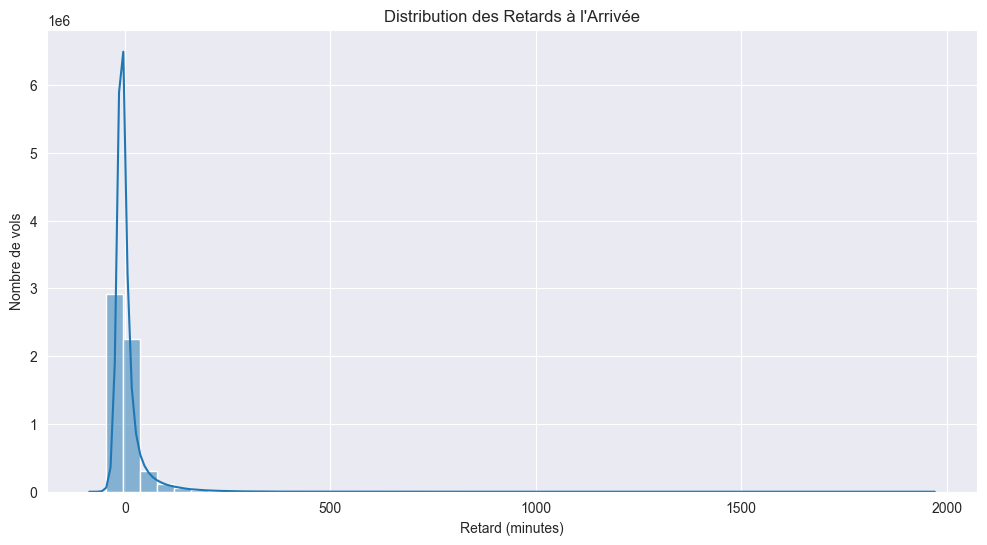

In [18]:
###########################################
# 1. ANALYSE DES RETARDS DE BASE
###########################################

# Distribution générale des retards
plt.figure(figsize=(12, 6))
sns.histplot(data=flights_df['ARRIVAL_DELAY'].dropna(), bins=50, kde=True)
plt.title('Distribution des Retards à l\'Arrivée')
plt.xlabel('Retard (minutes)')
plt.ylabel('Nombre de vols')
plt.show()

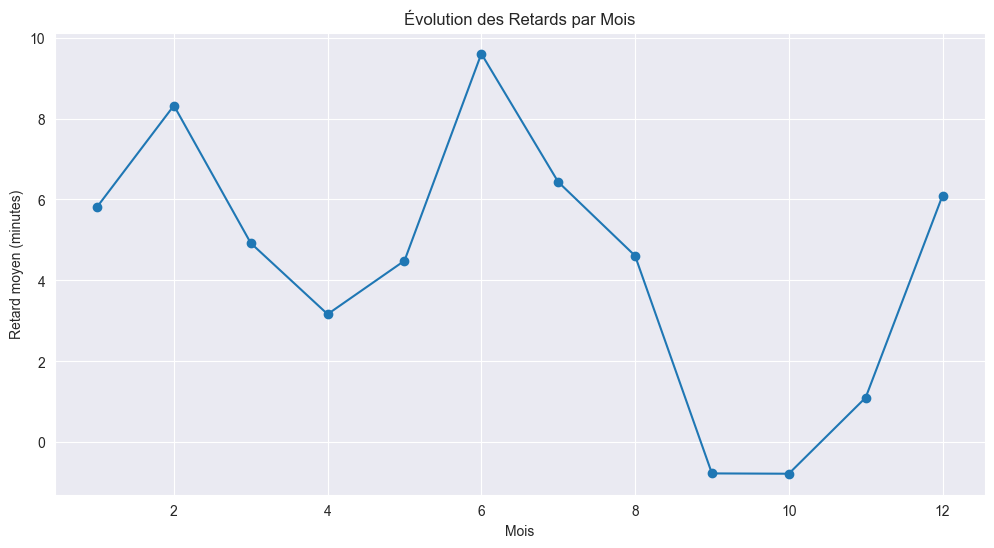

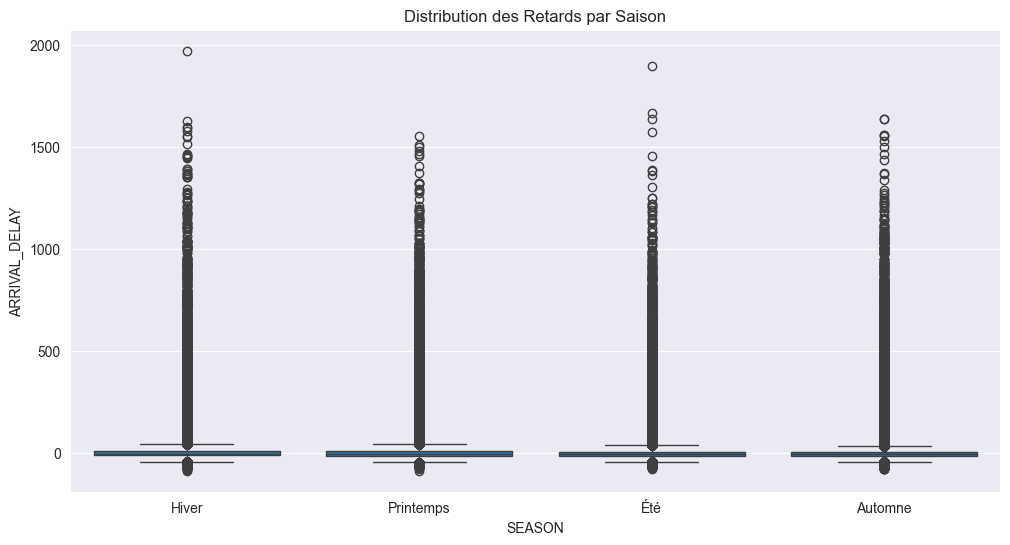

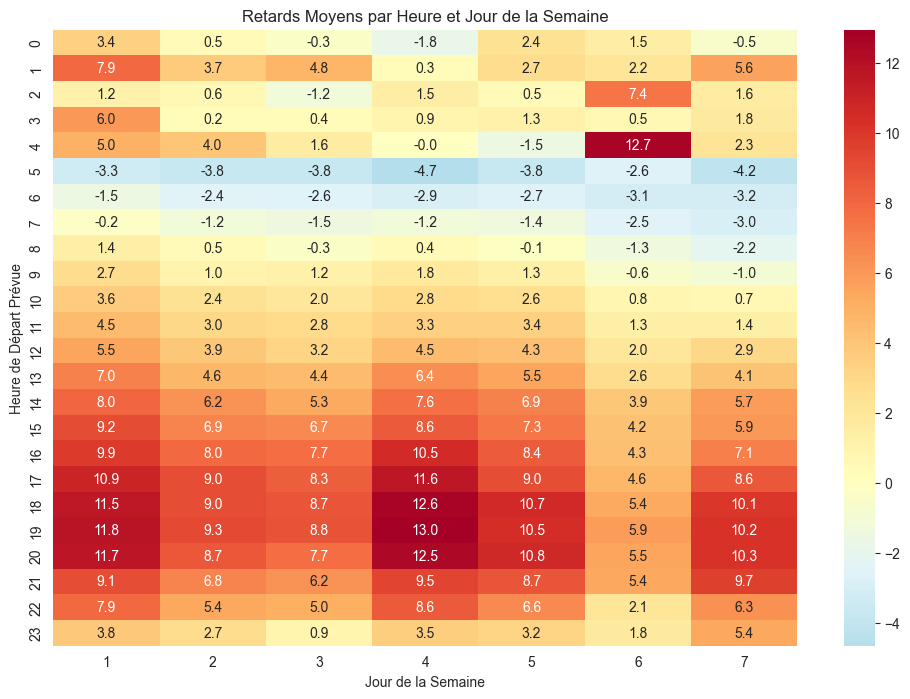

In [19]:
###########################################
# 2. ANALYSE TEMPORELLE
###########################################

# Préparation des données temporelles
flights_df['SCHEDULED_HOUR'] = flights_df['SCHEDULED_DEPARTURE'].apply(lambda x: int(str(x).zfill(4)[:2]))
flights_df['DATE'] = pd.to_datetime(flights_df[['YEAR', 'MONTH', 'DAY']].astype(str).agg('-'.join, axis=1))
flights_df['SEASON'] = pd.cut(flights_df['MONTH'], bins=[0,3,6,9,12], labels=['Hiver', 'Printemps', 'Été', 'Automne'])

# Retards par mois
plt.figure(figsize=(12, 6))
monthly_delays = flights_df.groupby('MONTH')['ARRIVAL_DELAY'].mean()
monthly_delays.plot(kind='line', marker='o')
plt.title('Évolution des Retards par Mois')
plt.xlabel('Mois')
plt.ylabel('Retard moyen (minutes)')
plt.grid(True)
plt.show()

# Retards par saison
plt.figure(figsize=(12, 6))
sns.boxplot(x='SEASON', y='ARRIVAL_DELAY', data=flights_df)
plt.title('Distribution des Retards par Saison')
plt.show()

# Heatmap jour-heure
pivot_table = flights_df.pivot_table(
    values='ARRIVAL_DELAY',
    index='SCHEDULED_HOUR',
    columns='DAY_OF_WEEK',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='RdYlBu_r', center=0, annot=True, fmt='.1f')
plt.title('Retards Moyens par Heure et Jour de la Semaine')
plt.xlabel('Jour de la Semaine')
plt.ylabel('Heure de Départ Prévue')
plt.show()


In [ ]:
###########################################
# 3. ANALYSE GÉOGRAPHIQUE ET DISTANCE
###########################################

# Relation distance-retard améliorée
plt.figure(figsize=(15, 5))

# Scatter plot avec ligne de tendance
plt.subplot(1, 2, 1)
sns.regplot(x='DISTANCE', y='ARRIVAL_DELAY', data=flights_df, scatter_kws={'alpha':0.1}, line_kws={'color': 'red'})
plt.title('Relation Distance-Retard avec Tendance')
plt.xlabel('Distance (miles)')
plt.ylabel('Retard (minutes)')

# Box plot par tranches de distance
flights_df['DISTANCE_RANGE'] = pd.qcut(flights_df['DISTANCE'], q=5, labels=['Très Court', 'Court', 'Moyen', 'Long', 'Très Long'])
plt.subplot(1, 2, 2)
sns.boxplot(x='DISTANCE_RANGE', y='ARRIVAL_DELAY', data=flights_df)
plt.title('Distribution des Retards par Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
###########################################
# 4. ANALYSE DES COMPAGNIES AÉRIENNES
###########################################

# Performance par compagnie
airline_delays = flights_df.groupby('AIRLINE')['ARRIVAL_DELAY'].agg(['mean', 'count']).round(2)
plt.figure(figsize=(12, 6))
airline_delays['mean'].plot(kind='bar')
plt.title('Retard Moyen par Compagnie Aérienne')
plt.xlabel('Compagnie')
plt.ylabel('Retard moyen (minutes)')
plt.xticks(rotation=45)
plt.show()

# Taux d'annulation
plt.figure(figsize=(12, 5))
cancellation_rate = flights_df.groupby('AIRLINE')['CANCELLED'].mean() * 100
plt.bar(cancellation_rate.index, cancellation_rate.values)
plt.title('Taux d\'Annulation par Compagnie (%)')
plt.xlabel('Compagnie')
plt.ylabel('Taux d\'Annulation (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
###########################################
# 5. ANALYSE DES ROUTES ET AÉROPORTS
###########################################

# Création et analyse des routes
flights_df['ROUTE'] = flights_df['ORIGIN_AIRPORT'] + ' -> ' + flights_df['DESTINATION_AIRPORT']
route_delays = flights_df.groupby('ROUTE')['ARRIVAL_DELAY'].agg(['mean', 'count'])
route_delays = route_delays[route_delays['count'] > 100].sort_values('mean', ascending=False)

print("\nTop 10 des routes avec le plus de retards :")
display(route_delays.head(10))

# Performance des aéroports
airport_performance = pd.DataFrame({
    'Retards_Départ': flights_df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean(),
    'Retards_Arrivée': flights_df.groupby('DESTINATION_AIRPORT')['ARRIVAL_DELAY'].mean()
})
airport_performance['Différence'] = airport_performance['Retards_Départ'] - airport_performance['Retards_Arrivée']

plt.figure(figsize=(12, 6))
airport_performance.sort_values('Retards_Départ', ascending=False).head(10)['Retards_Départ'].plot(kind='bar')
plt.title('Top 10 des Aéroports avec les Plus Grands Retards au Départ')
plt.xlabel('Aéroport')
plt.ylabel('Retard Moyen (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
###########################################
# 6. CORRÉLATIONS ET RELATIONS
###########################################

# Impact des retards au départ sur les retards à l'arrivée
plt.figure(figsize=(10, 6))
sns.scatterplot(data=flights_df, x='DEPARTURE_DELAY', y='ARRIVAL_DELAY', alpha=0.1)
plt.title('Impact des Retards au Départ sur les Retards à l\'Arrivée')
plt.xlabel('Retard au Départ (minutes)')
plt.ylabel('Retard à l\'Arrivée (minutes)')
plt.show()

# Matrice de corrélation
important_features = ['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'DISTANCE', 'SCHEDULED_HOUR', 'DAY_OF_WEEK', 'MONTH']
correlation_matrix = flights_df[important_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélations entre Variables Importantes')
plt.tight_layout()
plt.show()

In [ ]:
###########################################
# 7. STATISTIQUES FINALES
###########################################

print("\nStatistiques Clés pour la Modélisation:")
print("="*50)

# Taux de retards significatifs
retard_rate = (flights_df['ARRIVAL_DELAY'] > 15).mean() * 100
print(f"Pourcentage de vols avec retard significatif (>15min): {retard_rate:.2f}%")

# Statistiques par type de vol
print("\nStatistiques par type de vol (court/moyen/long courrier):")
display(flights_df.groupby('DISTANCE_RANGE')['ARRIVAL_DELAY'].describe())

In [ ]:
###########################################
# 8. ANALYSE DES TEMPS DE VOL
###########################################

# Comparaison temps prévu vs réel
plt.figure(figsize=(12, 6))
plt.scatter(flights_df['SCHEDULED_TIME'], flights_df['ELAPSED_TIME'], alpha=0.1)
plt.plot([0, flights_df['SCHEDULED_TIME'].max()], [0, flights_df['SCHEDULED_TIME'].max()], 'r--')
plt.title('Temps de Vol Prévu vs Réel')
plt.xlabel('Temps Prévu (minutes)')
plt.ylabel('Temps Réel (minutes)')
plt.show()

# Distribution des temps de roulage
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(flights_df['TAXI_OUT'], bins=50)
plt.title('Distribution des Temps de Roulage au Départ')

plt.subplot(1, 2, 2)
sns.histplot(flights_df['TAXI_IN'], bins=50)
plt.title('Distribution des Temps de Roulage à l\'Arrivée')
plt.tight_layout()
plt.show()

In [ ]:
###########################################
# 9. ANALYSE DES PATTERNS COMPLEXES
###########################################

# Effet combiné distance-heure
plt.figure(figsize=(12, 8))
pivot_distance_hour = flights_df.pivot_table(
    values='ARRIVAL_DELAY',
    index='SCHEDULED_HOUR',
    columns='DISTANCE_RANGE',
    aggfunc='mean'
)
sns.heatmap(pivot_distance_hour, cmap='RdYlBu_r', center=0, annot=True, fmt='.1f')
plt.title('Retards Moyens par Heure et Distance')
plt.show()

# Impact des retards cumulés
flights_df['IS_DELAYED'] = flights_df['ARRIVAL_DELAY'] > 15
delays_by_time = flights_df.groupby('SCHEDULED_HOUR')['IS_DELAYED'].agg(['mean', 'count'])
delays_by_time['mean'] = delays_by_time['mean'] * 100

plt.figure(figsize=(12, 6))
plt.plot(delays_by_time.index, delays_by_time['mean'], marker='o')
plt.title('Pourcentage de Vols Retardés par Heure')
plt.xlabel('Heure de la Journée')
plt.ylabel('% de Vols Retardés (>15 min)')
plt.grid(True)
plt.show()



In [ ]:
###########################################
# 10. ANALYSE DES PERFORMANCES GLOBALES
###########################################

# Calcul des KPIs globaux
print("\nKPIs Globaux:")
print("="*50)
print(f"Nombre total de vols: {len(flights_df):,}")
print(f"Taux d'annulation global: {flights_df['CANCELLED'].mean()*100:.2f}%")
print(f"Retard moyen à l'arrivée: {flights_df['ARRIVAL_DELAY'].mean():.2f} minutes")
print(f"Pourcentage de vols à l'heure (<15 min retard): {(flights_df['ARRIVAL_DELAY'] <= 15).mean()*100:.2f}%")

# Distribution des performances
performance_categories = pd.cut(flights_df['ARRIVAL_DELAY'], 
                              bins=[-float('inf'), -15, 0, 15, 30, 60, float('inf')],
                              labels=['Très en avance', 'En avance', 'À l\'heure', 
                                    'Léger retard', 'Retard modéré', 'Retard important'])

plt.figure(figsize=(12, 6))
performance_categories.value_counts().plot(kind='bar')
plt.title('Distribution des Performances de Vol')
plt.xlabel('Catégorie de Performance')
plt.ylabel('Nombre de Vols')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
###########################################
# 11. ANALYSE DES FACTEURS DE RISQUE
###########################################

# Création d'un score de risque
flights_df['RISK_SCORE'] = (
    (flights_df['DEPARTURE_DELAY'] > 15).astype(int) * 1 +
    (flights_df['DISTANCE'] > flights_df['DISTANCE'].median()).astype(int) * 1 +
    (flights_df['SCHEDULED_HOUR'].isin([7,8,17,18])).astype(int) * 1
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='RISK_SCORE', y='ARRIVAL_DELAY', data=flights_df)
plt.title('Retards en Fonction du Score de Risque')
plt.xlabel('Score de Risque')
plt.ylabel('Retard à l\'Arrivée (minutes)')
plt.show()



In [ ]:
###########################################
# 12. RECOMMENDATIONS POUR LA MODÉLISATION
###########################################

print("\nRecommandations pour la Modélisation:")
print("="*50)

# Features importantes
important_features = [
    'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'DISTANCE',
    'DAY_OF_WEEK', 'MONTH', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'
]

print("\nFeatures recommandées pour la modélisation:")
for feature in important_features:
    print(f"- {feature}")

# Suggestions de feature engineering
print("\nSuggestions de Feature Engineering:")
print("1. Créer des variables cycliques pour les heures/jours/mois")
print("2. Calculer les moyennes historiques par route")
print("3. Créer des indicateurs de période de pointe")
print("4. Utiliser les distances comme proxy de la durée du vol")
print("5. Créer des variables d'interaction route-période")



In [ ]:
###########################################
# 13. ANALYSE DE LA QUALITÉ DES DONNÉES
###########################################

# Vérification des valeurs aberrantes
print("\nAnalyse des Valeurs Aberrantes:")
print("="*50)

def check_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), len(outliers)/len(df) * 100

for col in ['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'DISTANCE']:
    count, percentage = check_outliers(flights_df, col)
    print(f"\n{col}:")
    print(f"Nombre de valeurs aberrantes: {count:,}")
    print(f"Pourcentage: {percentage:.2f}%")